In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.integrate as integrate


# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:

x_sim, y_sim, t  = sp.symbols('x y t')

f_1 = 1/sp.sqrt(sp.tan(x_sim))
f_2 =  sp.cos(x_sim)/x_sim**3
f_3  = 1/sp.sqrt(1-y_sim**2)


#Integral metodo trapezoidal para cada una de las integrales:



#Calculamos la función f_1

f_1 = f_1.subs(x_sim, np.pi/2 + (np.pi/2)*t)
f1 = sp.lambdify(t , f_1* np.pi/2)
#cambiamos el intervalo
inter_1 = np.linspace(-1 + 1e-5, 0 - 1e-5 , 10000)
result_t_1= integrate.trapezoid(f1(inter_1), inter_1 )
print(f"integral metodo trapezoidal f1 {result_t_1} ")
#No se puede calcular con trapecio ?¿




#Calculamos la función f_2

f2 = f_2.subs(x_sim, 1/t)* (-1 * 1/t**2)*-1
f2 = sp.lambdify(t, f2)

#construimos el intervalo como en 0 hay una singularidad, usamos algo muy cercano
inter_2 = np.linspace(0.000000001,1, 1000000)
print(f" integral metodo trapezoidal f2 {integrate.trapezoid(f2(inter_2), inter_2)}")

#Calculamos la función f_3

#Definimos el primer intervalo de integración para x
inter_3_x = np.linspace( 0 , np.pi/4, 10000)
f3 = sp.lambdify( y_sim, f_3)
def integral_int(x):
  #Definimos el segundo intervalo de integración para y
  inter_3_y = np.linspace(0, np.sin(x), 10000)
  return integrate.trapezoid(f3(inter_3_y), inter_3_y)


result = integrate.trapezoid([integral_int(x) for x in inter_3_x], inter_3_x)
print(f" resutado de la integral metodo trapezoidal f3 {result}")






integral metodo trapezoidal f1 2.2213778449803185 
 integral metodo trapezoidal f2 0.01811762693033788
 resutado de la integral metodo trapezoidal f3 0.30842513766192337


In [ ]:
#Se calcula con el metodo de simpson las 3 funciones

#Primera función

result_1 = integrate.simpson(f1(inter_1), x=inter_1)
print(f"Integral por simpson de f1 {result_1}")

#segunda función
result_2 = integrate.simpson(f2(inter_2), x=inter_2)
print(f"Integral por simpson de f2 {result_2}")

#tercera función

def int_simp_(x):
  inter_3_y = np.linspace(0, np.sin(x), 10000)
  return integrate.simpson(y = f3(inter_3_y), x= inter_3_y)


result_3 = integrate.simpson(y =[int_simp_(x) for x in inter_3_x],x= inter_3_x)
print(f"El resultado de la integral por simpson de f3 {result_3}")

Integral por simpson de f1 2.2171517477447917
Integral por simpson de f2 0.018117629625422835
El resultado de la integral por simpson de f3 0.3084251375340424


In [ ]:
#Usamos el metodo de cuadratura
#primera función
result_1_c = integrate.quad(f1, -1, 0)
print(f"El resultado de la integral es {result_1_c[0]}")


#segunda función
result_2_c = integrate.quad(f2, 0, 1, limit=1000)
print(f"El resultado de la integral es {result_2_c[0]}")

#Tercera función
f3_1 = lambda y_sim ,x_sim: 1/np.sqrt(1-y_sim**2)
result_3_c =integrate.dblquad(f3_1, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x))
print(f"El resultado de la integral es {result_3_c[0]}")





El resultado de la integral es 2.221441469079864
El resultado de la integral es 0.018117621554564665
El resultado de la integral es 0.30842513753404244


In [ ]:
integrate.quad?

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



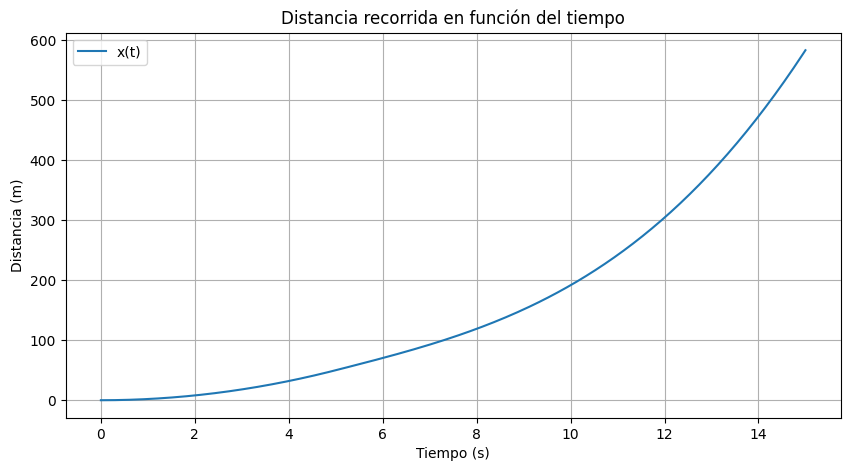

Trabajo realizado: 116666.67 J


In [2]:

# Definir los intervalos de tiempo
t1 = np.linspace(0, 5, 100)
t2 = np.linspace(5, 15, 200)

# Calcular la posición x(t) para cada intervalo
x1 = 2 * t1**2  # Integral de 4t (0 ≤ t ≤ 5)
x2 = (1/3)*t2**3 - 5*t2**2 + 45*t2 - 275/3  # Integral de 20 + (5-t)^2 (5 ≤ t ≤ 15)

# Combinar los resultados
t_total = np.concatenate([t1, t2])
x_total = np.concatenate([x1, x2])

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t_total, x_total, label='x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.title('Distancia recorrida en función del tiempo')
plt.grid(True)
plt.legend()
plt.show()

# Calcular el trabajo (fuerza * desplazamiento total)
desplazamiento_total = x_total[-1]  # x(15)
F = 200  # Newtons
trabajo = F * desplazamiento_total

print(f"Trabajo realizado: {trabajo:.2f} J")

In [ ]:
#Aquí va su código

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import romberg, quad

# Definir las funciones Q(t) y c(t)
Q = lambda t: 9 + 5 * np.cos(0.4 * t)**2
c = lambda t: 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)



# Función integrando: Q(t) * c(t)
integrando = lambda t: Q(t) * c(t)

# Calcular la integral con Romberg
M_romberg = romberg(integrando, 2, 8, divmax=10, tol=1e-6)

# Calcular la integral con cuadratura Gaussiana adaptativa (quad)
M_quad, error = quad(integrando, 2, 8)

# Resultados
print(f"Masa transportada (Romberg): {M_romberg:.4f} mg")
print(f"Masa transportada (Quad): {M_quad:.4f} mg")
print(f"Error estimado en Quad: {error:.2e} mg")

Masa transportada (Romberg): 335.9625 mg
Masa transportada (Quad): 335.9625 mg
Error estimado en Quad: 3.73e-12 mg


<ipython-input-5-38ad587f158a>:15: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M_romberg = romberg(integrando, 2, 8, divmax=10, tol=1e-6)


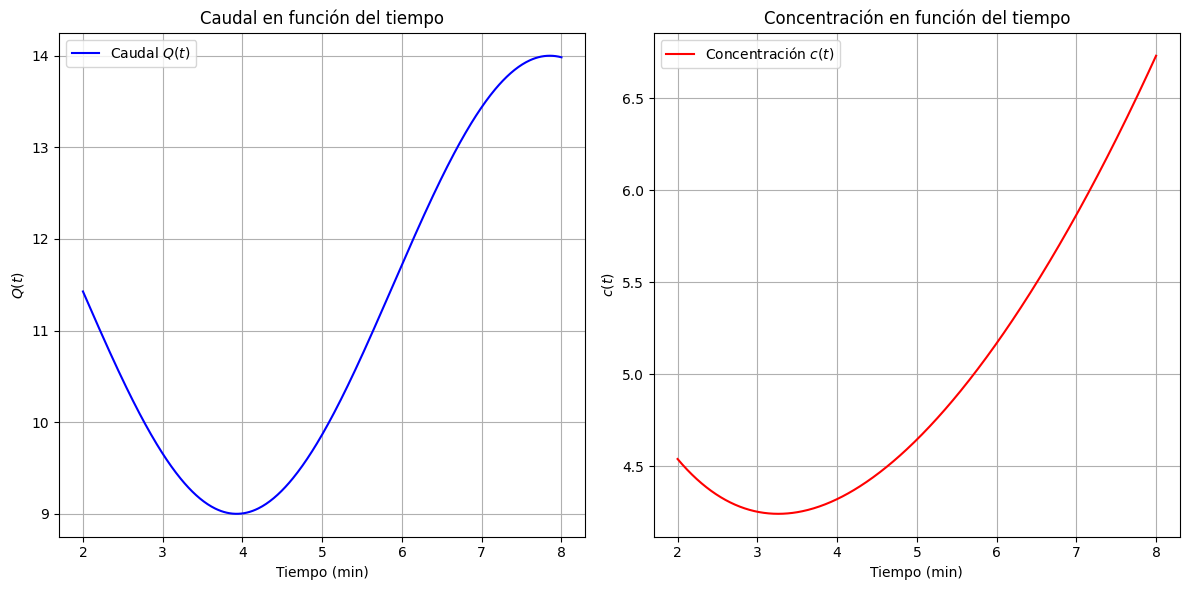

In [4]:
# Crear datos para el gráfico
t = np.linspace(2, 8, 500)
Q_vals = Q(t)
c_vals = c(t)

# Graficar Q(t) y c(t)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, Q_vals, 'b', label='Caudal $Q(t)$')
plt.xlabel('Tiempo (min)')
plt.ylabel('$Q(t)$')
plt.title('Caudal en función del tiempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, c_vals, 'r', label='Concentración $c(t)$')
plt.xlabel('Tiempo (min)')
plt.ylabel('$c(t)$')
plt.title('Concentración en función del tiempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [7]:
import numpy as np
import scipy.integrate as spi
from scipy.special import ellipe
import math

# 1. Parámetros iniciales del péndulo
I0 = 1.0       # Momento de inercia (kg·m²)
m = 1.0        # Masa (kg)
g = 9.81       # Gravedad (m/s²)
b = 1.0        # Distancia al centro de masa (m)
theta0 = np.pi / 3  # Amplitud inicial (60 grados en radianes)

# 2. Calcular P_b (período para pequeñas oscilaciones)
Pb = 2 * np.pi * np.sqrt(I0 / (m * g * b))

# 3. Calcular k = sin(theta0 / 2)
k = np.sin(theta0 / 2)

# Función integrando para la integral elíptica
def integrando(phi):
    return 1 / np.sqrt(1 - (k**2) * np.sin(phi)**2)

# Calcular la integral usando quad (cuadratura adaptativa)
integral, error = spi.quad(integrando, 0, np.pi/2)

# Calcular el período P
P = (2 * Pb / np.pi) * integral

# 4. Comparar con el valor exacto usando scipy.special.ellipe
integral_exacta = ellipe(k**2)  # SciPy usa k² en ellipe
P_exacto = (2 * Pb / np.pi) * integral_exacta

# Resultados
print("--------------------------------------------------")
print(f"Período para pequeñas oscilaciones (P_b): {Pb:.4f} s")
print(f"Valor de k: {k:.4f}")
print(f"Integral numérica: {integral:.6f} (error estimado: {error:.2e})")
print(f"Integral exacta (ellipe): {integral_exacta:.6f}")
print(f"Período calculado (P): {P:.4f} s")
print(f"Período exacto (P_exacto): {P_exacto:.4f} s")
print("--------------------------------------------------")

--------------------------------------------------
Período para pequeñas oscilaciones (P_b): 2.0061 s
Valor de k: 0.5000
Integral numérica: 1.685750 (error estimado: 1.87e-14)
Integral exacta (ellipe): 1.467462
Período calculado (P): 2.1529 s
Período exacto (P_exacto): 1.8741 s
--------------------------------------------------


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
#Aquí va su código

#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


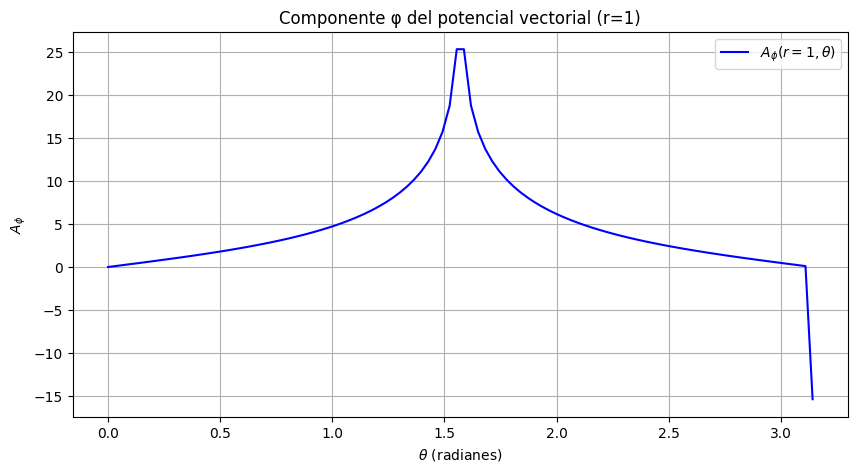

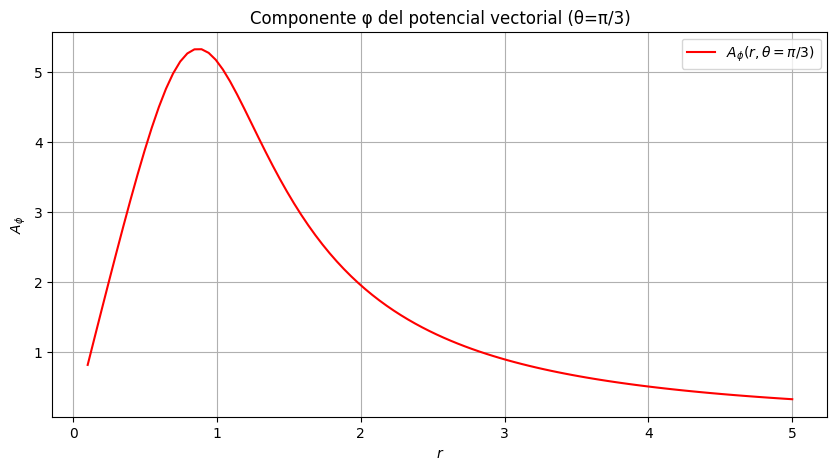

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipe

# Parámetros dados
a = 1.0
I = 3.0
mu0_4pi = 1.0  # μ₀/(4π) = 1

# Función para calcular Aφ
def A_phi(r, theta):
    sin_theta = np.sin(theta)
    denominador_k2 = a**2 + r**2 + 2*a*r*sin_theta
    k2 = (4*a*r*sin_theta) / denominador_k2

    # Evitar división por cero si k² = 0
    if k2 == 0:
        return 0.0

    k = np.sqrt(k2)
    m = k2  # SciPy usa m = k²

    # Calcular integrales elípticas
    K = ellipk(m)
    E = ellipe(m)

    # Términos de la expresión
    term1 = (2 - k2) * K - 2 * E
    term2 = k2
    prefactor = (4 * I * a) / np.sqrt(denominador_k2)

    return prefactor * (term1 / term2)

# ---------------------------
# Parte a: Aφ(r=1, θ variable)
# ---------------------------
theta_values = np.linspace(0, np.pi, 100)
A_phi_a = [A_phi(1, theta) for theta in theta_values]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(theta_values, A_phi_a, 'b-', label=r'$A_\phi(r=1, \theta)$')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$A_\phi$')
plt.title('Componente φ del potencial vectorial (r=1)')
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------
# Parte b: Aφ(θ=π/3, r variable)
# ---------------------------
r_values = np.linspace(0.1, 5, 100)  # Evitar r=0 (singularidad)
theta_fijo = np.pi/3
A_phi_b = [A_phi(r, theta_fijo) for r in r_values]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(r_values, A_phi_b, 'r-', label=r'$A_\phi(r, \theta=\pi/3)$')
plt.xlabel(r'$r$')
plt.ylabel(r'$A_\phi$')
plt.title('Componente φ del potencial vectorial (θ=π/3)')
plt.grid(True)
plt.legend()
plt.show()